In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# https://www.geeksforgeeks.org/implementing-apriori-algorithm-in-python/
# https://pbpython.com/market-basket-analysis.html


In [2]:
#load dataset
df=pd.read_csv('AB_NYC_2019.csv')
# df.head()

In [3]:
# Show, which attributes (variables), have missing values.
# null_data = df[df.isnull().any(axis=1)]
print(df.isnull().any())
# df.isnull().sum()

id                                False
name                               True
host_id                           False
host_name                          True
neighbourhood_group               False
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
last_review                        True
reviews_per_month                  True
calculated_host_listings_count    False
availability_365                  False
dtype: bool


In [9]:
# 2
# Print out on the screen the total number of unique values of the categorical 
# attributes: (minimum_nights, neighbourhood, room_type, price, number_of_reviews, 
# availability_365)
col = ['minimum_nights', 'neighbourhood', 'room_type', 'price', 'number_of_reviews','availability_365']
for c in col:
    print((df[c].nunique()))

109
221
3
674
394
366


In [10]:
# Print out unique values in neighbourhood_group with their frequencies
df['neighbourhood_group'].value_counts ()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

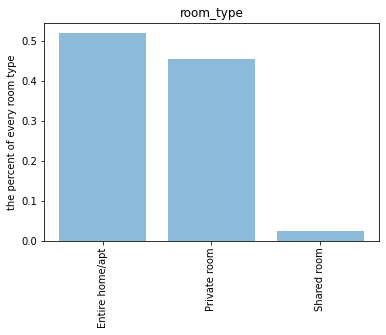

In [11]:
# Plot the distribution of categorical attribute room type (In other words, visualize the 
# categorical values for the room_type in a histogram by plotting the percentage of every 
# room type).
lis=df['room_type'].value_counts (normalize=True)
labels = ('Entire home/apt','Private room','Shared room')
xpos=np.arange(3)
plt.bar(xpos,lis,align='center')
plt.xticks(xpos,labels,rotation=90)
plt.title('room_type')
plt.ylabel('the percent of every room type')
plt.show()


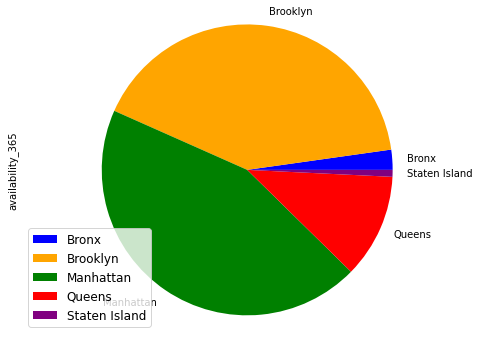

In [12]:
# Plot in a Pie Chart the distribution of neighbourhood_group using availability_365
# attribute (with y='availability_365').
labels = ('Bronx', 'Brooklyn','Manhattan','Queens','Staten Island')
colors = ["blue", "orange", "green", "red", "purple"]
ne_group = df.groupby('neighbourhood_group')['availability_365'].count().reset_index()
plt.figure(figsize=(8,6))
plt.pie(ne_group['availability_365'],labels=labels, colors=colors)
plt.axis('equal')
plt.legend(labels=ne_group['neighbourhood_group'],loc='lower left',fontsize='12')
plt.ylabel('availability_365')
plt.show()



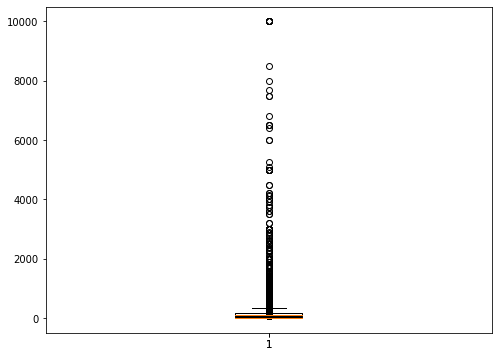

In [90]:
# Check whether price and number_of_reviews have outliers or not 

# plt.boxplot(df[['price','number_of_reviews']])

plt.figure(figsize=(8,6))
plt.boxplot(df['price'])
plt.show()

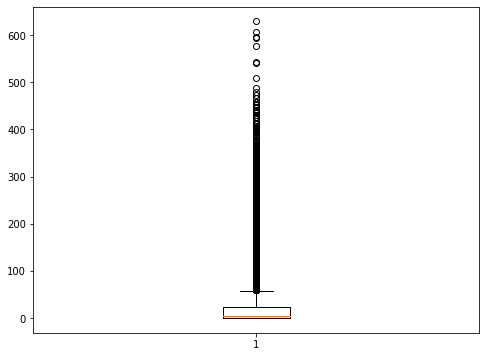

In [14]:
plt.figure(figsize=(8,6))
plt.boxplot(df['number_of_reviews'])
plt.show()

In [12]:
df2 =df.groupby('calculated_host_listings_count')['room_type']
print(df2)

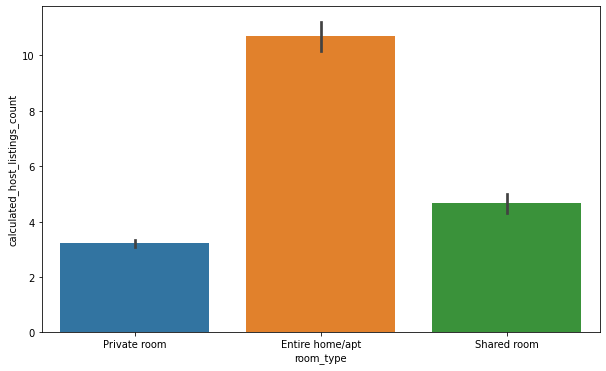

In [15]:
# Plot the distribution of the categorical attribute room type vs 
# calculated_host_listings_count (In other words, visualize the categorical values for the 
# room_type in a histogram, whose Y – Axis is the calculated_host_listings_count).

plt.figure(figsize=(10, 6))
sns.barplot(x="room_type",y='calculated_host_listings_count',data=df)
plt.show()


In [16]:
# Since (reviews_per_month) is continuous, the mean will be used to handle missed data 
# in this attribute.

mean = df['reviews_per_month'].mean();
df['reviews_per_month']=df['reviews_per_month'].fillna(mean)
df['reviews_per_month']

0        0.210000
1        0.380000
2        1.373221
3        4.640000
4        0.100000
           ...   
48890    1.373221
48891    1.373221
48892    1.373221
48893    1.373221
48894    1.373221
Name: reviews_per_month, Length: 48895, dtype: float64

In [69]:
# After showing this in our code (filling null values of reviews_per_month by mean), we 
# change our mind because we discover that the mean is not suitable (note we are 
# talking about number of reviews per month). Therefore, we decided to fill the 
# original null values by zero – instead of mean. Show this change in your code 
df['reviews_per_month']=df['reviews_per_month'].replace([mean],0)
df['reviews_per_month']

In [49]:
# To handle missed data of both name and host_name, which are categorical, a new class 
# called (global constant) will be used.
# df[['name','host_name']].isnull().sum()

df[['name','host_name']]=df[['name','host_name']].fillna({
    'name':'global constant',
    'host_name':'global constant'
})


In [45]:
# Check whether the category values of (room_type), is consistent. If they are 
# inconsistent, unify categories.
print(df['room_type'].unique())
print(df['room_type'].isna().any())

print('category values of room_type is consistent' )

df['room_type']

['Private room' 'Entire home/apt' 'Shared room']
False
category values of room_type is consistent


0           Private room
1        Entire home/apt
2           Private room
3        Entire home/apt
4        Entire home/apt
              ...       
48890       Private room
48891       Private room
48892    Entire home/apt
48893        Shared room
48894       Private room
Name: room_type, Length: 48895, dtype: object

In [72]:
# Since the (room_type) variable has only 3 levels ("Entire home/apt", "Private room", 
# "Shared room"), you decided to convert the variable values into a numeric discrete
# attribute with the value 0 for "Entire home/apt", the value 1 for "Private room" and 
# the value 2 for "Shared room".
df['room_type']=df['room_type'].replace({'Entire home/apt':0, 'Private room':1, 'Shared room':2})

df['room_type']

In [83]:
# Use Z-score to standardize/normalize price. Show your data after adding the Price Z 
# score. Print out price with its Z-Score values (just print a sample not all values).

from sklearn import preprocessing
print(df['price'].head())
scaler = preprocessing.StandardScaler()
mean = df['price'].mean()
std = df['price'].std()
df['price'] = (df['price']-mean)/std
df['price'].head()
# df.sample(n=10)

0    149
1    225
2    150
3     89
4     80
Name: price, dtype: int64


0   -0.015493
1    0.300970
2   -0.011329
3   -0.265332
4   -0.302808
Name: price, dtype: float64

In [76]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [75]:
# You decided to drop last_review variable because we are not going to use it.
df = df.drop('last_review' ,axis=1)
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

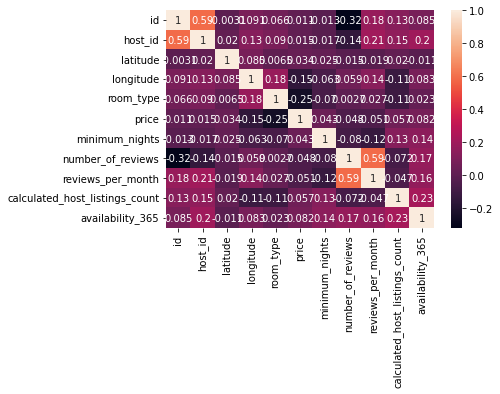

In [77]:
# Print out Correlation matrix in terms of heatmap between all variables.
plt.figure()
sns.heatmap(df.corr(),annot=True)
plt.show()

-567.7418220547338 873.1831964283917


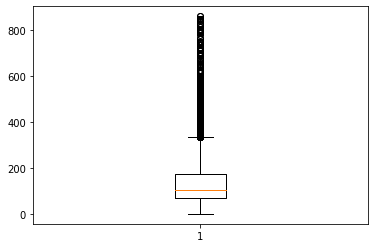

In [21]:
#  Using the computed Z-score values for the price, write a code to guarantee that 
# outliers in z-scores will be removed. 
me = df['price'].mean()
std = df['price'].std()

lower = me -  3* std
upper = me +  3* std
print(lower,upper)
price1 = df['price'][(df['price']>=lower)&(df['price']<=upper)]
plt.boxplot(price1)
plt.show()


Text(0.5, 1.0, 'Price distribution by neighbourhood group')

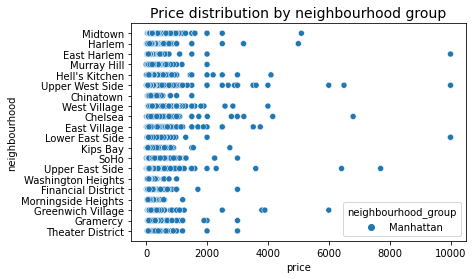

In [22]:
# Determine the price range in both Manhattan and Bronx (neighbourhood attribute). To 
# Hint: do this, you have to plot price Distribution in every neighbourhood_group based 
# on the neighbourhood (s) (in other words, plot neighbourhood (s) and price for each 
# neighbourhood_group 
top_area=df['neighbourhood'].loc[(df['neighbourhood_group']=='Manhattan')].value_counts()
toprow= list(top_area[:20].sort_values().index)

topneighbourhood = df[df['neighbourhood'].isin(toprow)]
sns.scatterplot(x="price",y='neighbourhood',hue='neighbourhood_group', data=topneighbourhood)
plt.title("Price distribution by neighbourhood group", fontsize=14)

Text(0.5, 1.0, 'Price distribution')

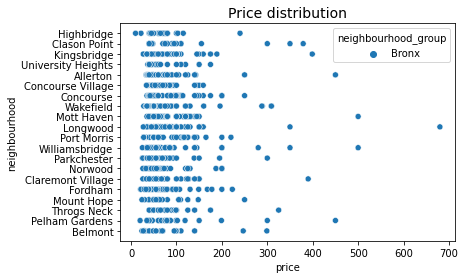

In [23]:
top_area=df['neighbourhood'].loc[(df['neighbourhood_group']=='Bronx')].value_counts()
toperea= list(top_area[:20].sort_values().index)

topneighbourhood = df[df['neighbourhood'].isin(toperea)]
sns.scatterplot(x="price",y='neighbourhood',hue='neighbourhood_group', data=topneighbourhood)
plt.title("Price distribution", fontsize=14)